In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from os import listdir
import pandas as pd
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
sampl = pd.read_csv('/kaggle/input/prediction-of-sepsis/training_setA/training/p000001.psv', sep='|')
sampl.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0


In [16]:
from os import listdir

a_traincsv = listdir('/kaggle/input/prediction-of-sepsis/training_setA/training/')
b_traincsv = listdir('/kaggle/input/prediction-of-sepsis/training_setB/training_setB/')

with open("train.psv", "wb") as fout:
    for i, csv in enumerate(a_traincsv):
        # first file:
        if i == 0:
            with open('/kaggle/input/prediction-of-sepsis/training_setA/training/' + csv, "rb") as f:
                fout.write(f.read())
        # now the rest:
        with open('/kaggle/input/prediction-of-sepsis/training_setA/training/' + csv, "rb") as f:
            next(f)  # skip the header
            fout.write(f.read())

    for i, csv in enumerate(b_traincsv):
        if i < 10000:
            with open('/kaggle/input/prediction-of-sepsis/training_setB/training_setB/' + csv, "rb") as f:
                next(f)  # skip the header
            


In [18]:
train = pd.read_csv('/kaggle/working/train.psv', sep ='|')
train.shape

(790258, 41)

In [20]:
with open("validation.psv", "wb") as fout:
    for i, csv in enumerate(b_traincsv):
        if i >= 10000 and i < 15000:
            # first file:
            if i == 10000:
                with open('/kaggle/input/prediction-of-sepsis/training_setB/training_setB/' + csv, "rb") as f:
                    fout.write(f.read())
            # now the rest:
            with open('/kaggle/input/prediction-of-sepsis/training_setB/training_setB/' + csv, "rb") as f:
                next(f)  # skip the header
                fout.write(f.read())


In [21]:
validation = pd.read_csv('/kaggle/working/validation.psv', sep ='|')
validation.shape

(190654, 41)

In [24]:
with open("test.psv", "wb") as fout:
    for i, csv in enumerate(b_traincsv):
        if i >= 15000:
            # first file:
            if i == 15000:
                with open('/kaggle/input/prediction-of-sepsis/training_setB/training_setB/' + csv, "rb") as f:
                    fout.write(f.read())
            # now the rest:
            with open('/kaggle/input/prediction-of-sepsis/training_setB/training_setB/' + csv, "rb") as f:
                next(f)  # skip the header
                fout.write(f.read())


In [25]:
test = pd.read_csv('/kaggle/working/test.psv', sep ='|')
test.shape

(190150, 41)

In [2]:
train=pd.read_csv("/kaggle/input/train-sepsis/train.psv",sep='|')

#PRE-PROCESSING


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
     

In [4]:
train['SepsisLabel'].value_counts()


SepsisLabel
0    773122
1     17136
Name: count, dtype: int64

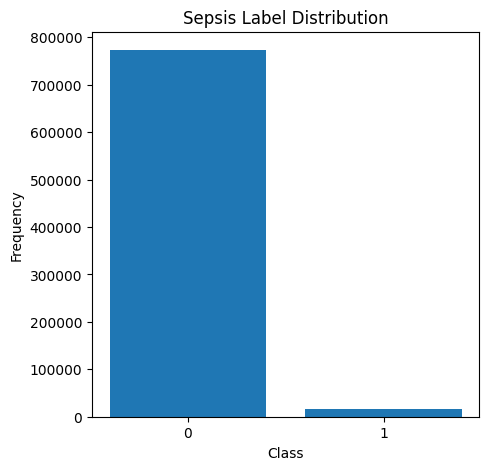

In [5]:

rcParams['figure.figsize'] = 5, 5

plt.bar(train['SepsisLabel'].value_counts().index,
        train['SepsisLabel'].value_counts())
plt.xticks([0,1])
plt.xlabel('Class')
plt.title('Sepsis Label Distribution')
_ = plt.ylabel('Frequency')
     

As we can see from the plot, it is a case of severe class imbalance . There are multiple methods that we could try to balance it (Over sampling or Undersampling) or even proceed without balancing but change the evaluation metric to average precision or roc_auc_sore

<Axes: >

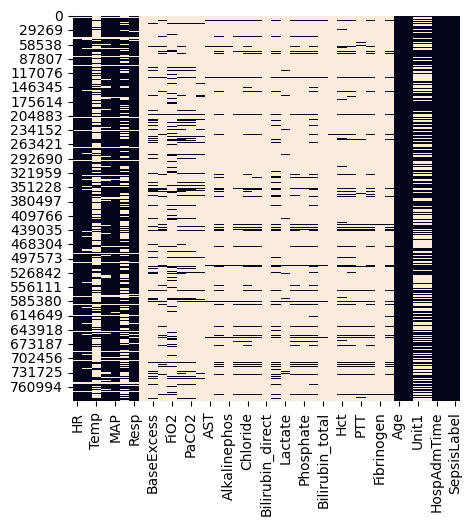

In [6]:
sns.heatmap(train.isnull(), cbar=False)


In [7]:

missing = (train.isnull().sum() / train.shape[0]) * 100
missing

HR                    7.743041
O2Sat                12.031640
Temp                 66.224954
SBP                  15.212753
MAP                  10.232101
DBP                  48.125549
Resp                  9.776681
EtCO2               100.000000
BaseExcess           89.575050
HCO3                 91.949465
FiO2                 85.806154
pH                   88.533112
PaCO2                91.231851
SaO2                 95.044656
AST                  98.504159
BUN                  91.840766
Alkalinephos         98.540603
Calcium              95.024283
Chloride             91.676136
Creatinine           93.357865
Bilirubin_direct     99.850429
Glucose              87.768678
Lactate              96.565172
Magnesium            92.219756
Phosphate            94.951143
Potassium            89.137851
Bilirubin_total      98.773312
TroponinI            99.877888
Hct                  88.223972
Hgb                  91.164405
PTT                  95.152596
WBC                  92.489668
Fibrinog

Text(0.5, 1.0, 'Percentage of missing data in each feature')

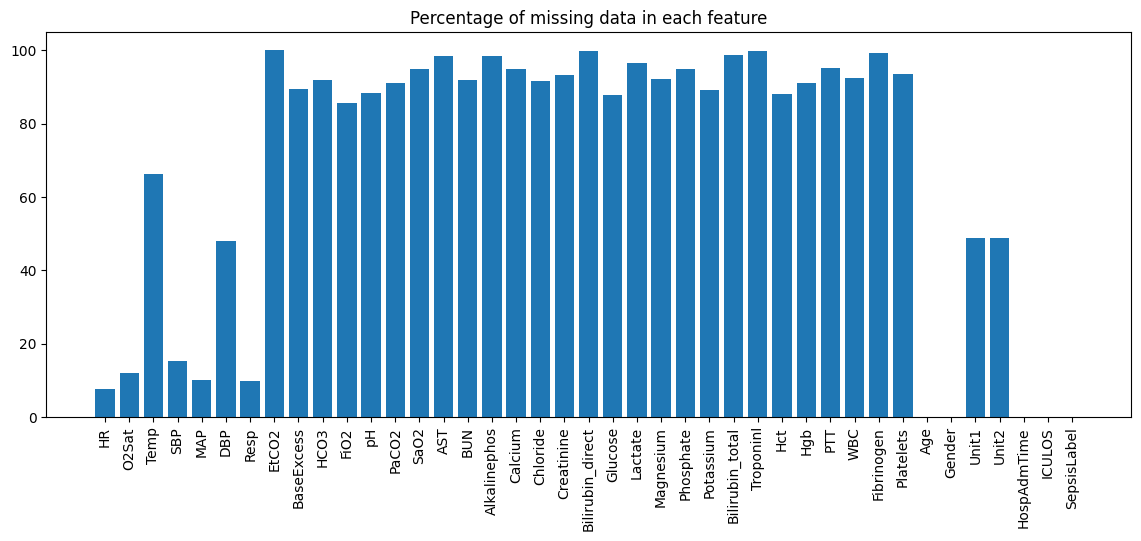

In [8]:

rcParams['figure.figsize'] = 14, 5
_ = plt.bar(missing.index, missing)
_ = plt.xticks(missing.index, rotation=90)

plt.title("Percentage of missing data in each feature")

In [9]:

selected_cols = list(missing[missing < 90].index)
selected_cols

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'BaseExcess',
 'FiO2',
 'pH',
 'Glucose',
 'Potassium',
 'Hct',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [10]:

filter_train = train[selected_cols]
filter_train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0
1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,0.4,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0
2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0
3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0
4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,0.4,NaN,161.0,3.2,29.7,68.54,0,NaN,NaN,-0.02,5,0


In [11]:

categorical = filter_train.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True


In [12]:
cat_vars = list(categorical[categorical].index)
cont_vars = list(categorical[~categorical].index)
cont_vars.pop(-1)


'SepsisLabel'

/tmp/ipykernel_32/2620905744.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filter_train[var].dropna(), axlabel=var);
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_32/2620905744.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function

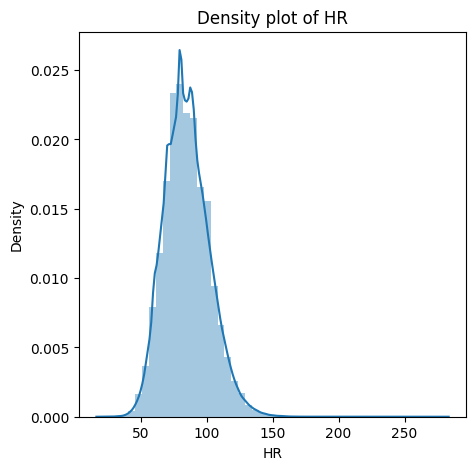

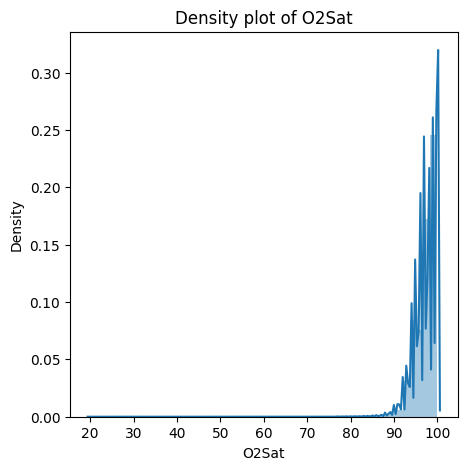

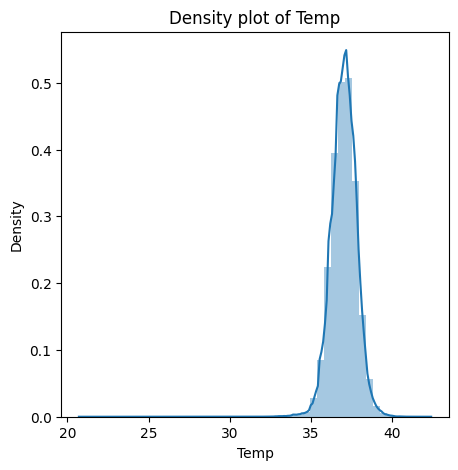

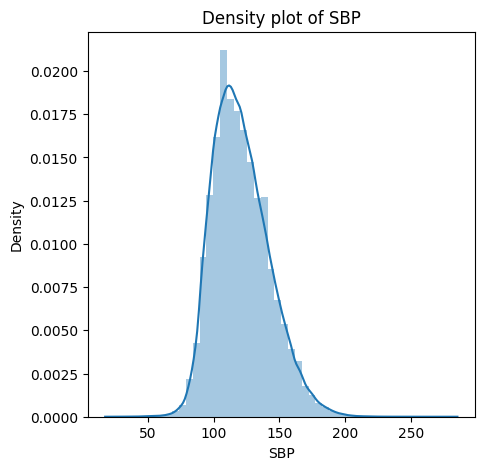

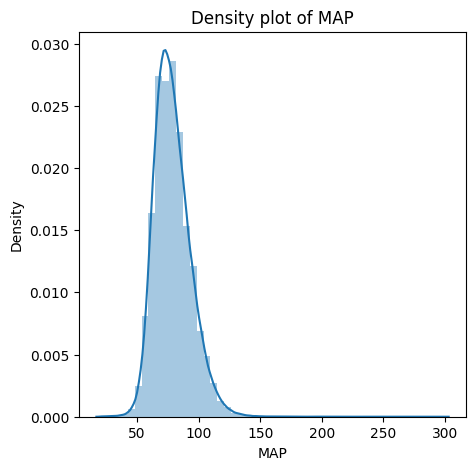

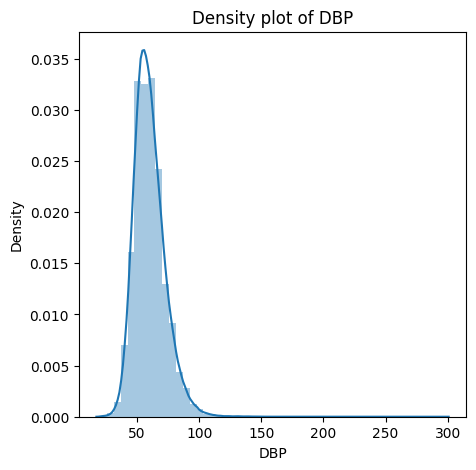

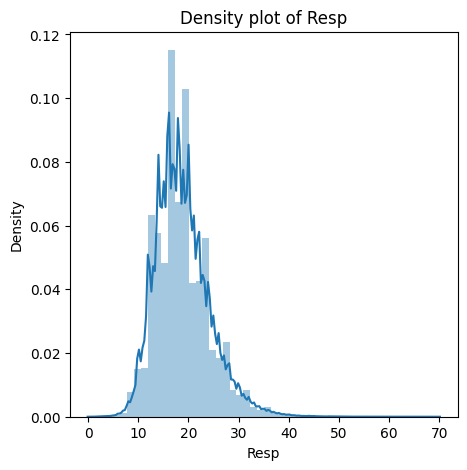

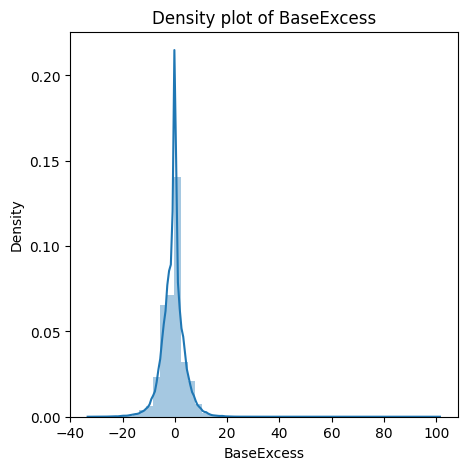

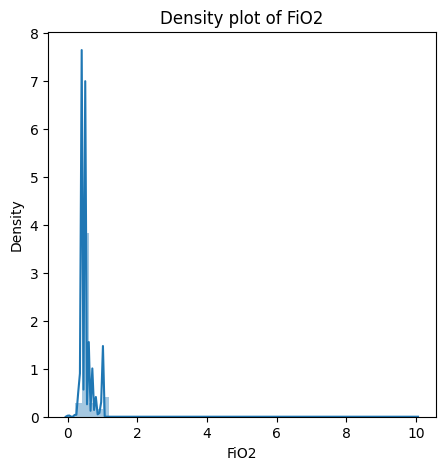

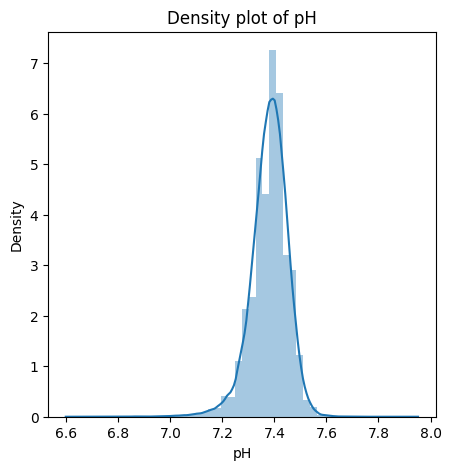

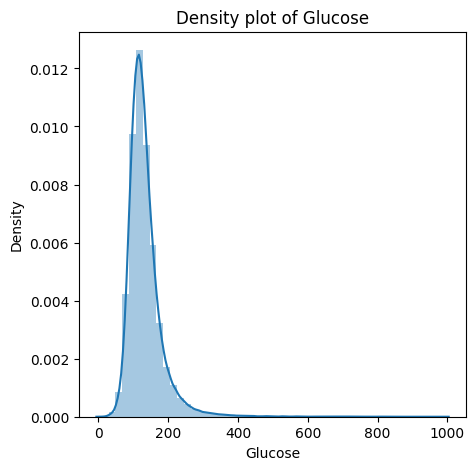

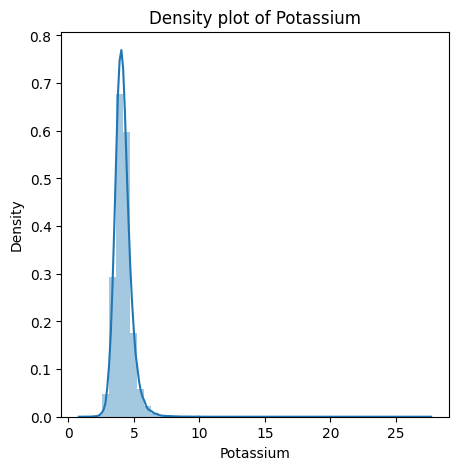

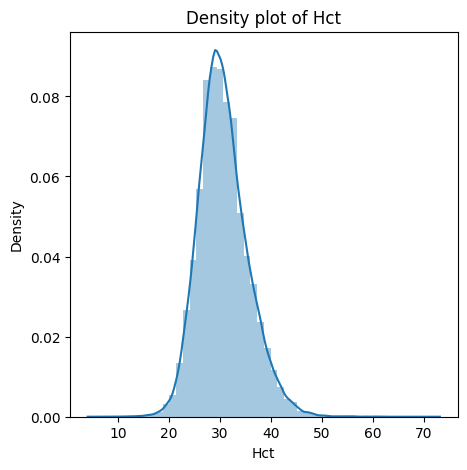

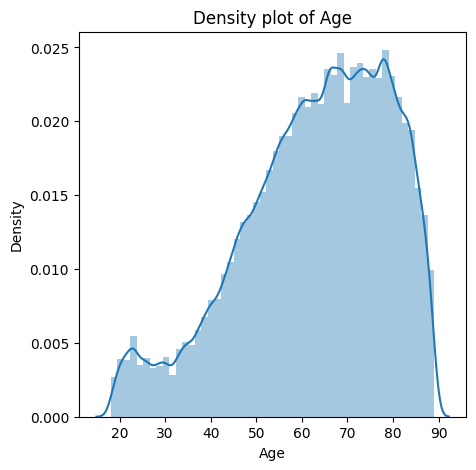

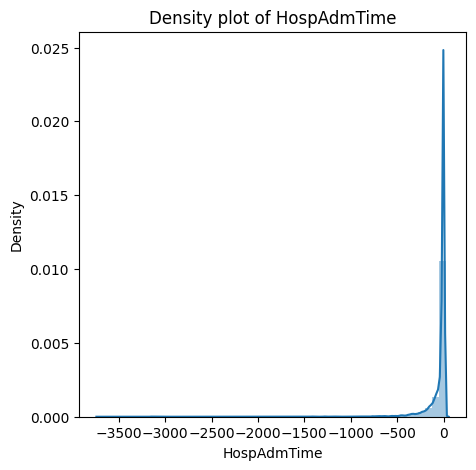

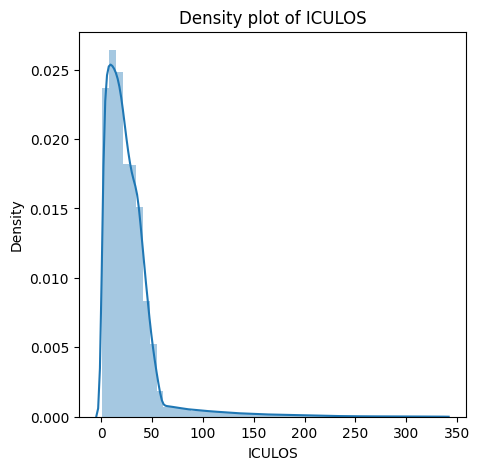

In [13]:
rcParams['figure.figsize'] = 5, 5
for i,var in enumerate(cont_vars):
    plt.figure(i)
    plt.title("Density plot of " + str(var))
    sns.distplot(filter_train[var].dropna(), axlabel=var);
     

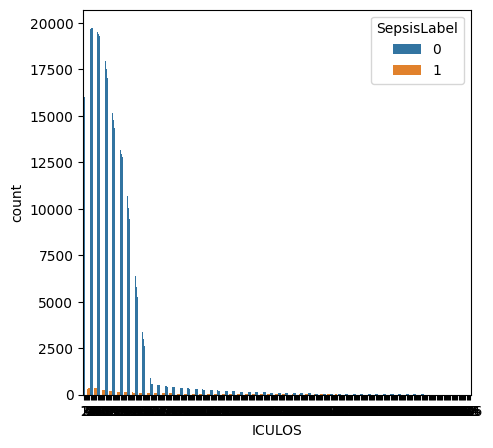

In [14]:
sns.countplot(x=var, hue='SepsisLabel', data=filter_train);


In [15]:

features = cont_vars + cat_vars
features

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'BaseExcess',
 'FiO2',
 'pH',
 'Glucose',
 'Potassium',
 'Hct',
 'Age',
 'HospAdmTime',
 'ICULOS',
 'Gender',
 'Unit1',
 'Unit2']

In [16]:

X_train = filter_train[features]
y_train = filter_train['SepsisLabel']

In [17]:

categorical = X_train.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [18]:

cont_scale_pipeline = make_pipeline(SimpleImputer(strategy = "median"), 
                                    StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = "constant", 
                                           fill_value = 999), 
                             OneHotEncoder(handle_unknown="ignore"))
preprocess_trans_scale = make_column_transformer((cont_scale_pipeline, 
                                                  ~categorical), 
                                                 (cat_pipeline, categorical))

In [ ]:
logistic_pipe_scale = make_pipeline(preprocess_trans_scale, 
                                    LogisticRegression(solver='lbfgs') )
rf_pipe_scale = make_pipeline(preprocess_trans_scale, RandomForestClassifier())
svc_pipe_scale = make_pipeline(preprocess_trans_scale, SVC())
gb_pipe_scale = make_pipeline(preprocess_trans_scale, GradientBoostingClassifier())
dt_pipe_scale = make_pipeline(preprocess_trans_scale, DecisionTreeClassifier() )
gmm_pipe_scale = make_pipeline(preprocess_trans_scale, GaussianMixture(n_components=2))
mlp_pipe_scale = make_pipeline(preprocess_trans_scale, MLPClassifier() )


In [ ]:
scores_logistic_pipe_scale = cross_validate(logistic_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])





In [22]:
scores_gb_pipe_scale = cross_validate(gb_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])



In [23]:
log_df = pd.DataFrame(scores_logistic_pipe_scale)
log_df['model'] = 'LogisticRegression'

In [24]:
gb_df = pd.DataFrame(scores_gb_pipe_scale)
gb_df['model'] = 'GradientBoosting'

In [25]:
results = pd.concat([log_df, gb_df])


In [26]:
results

,fit_time,score_time,test_average_precision,test_roc_auc,test_precision,test_recall,model
0,4.443459,1.038034,0.080409,0.735867,0.138686,0.003326,LogisticRegression
1,4.791936,1.070051,0.078781,0.737531,0.174825,0.004377,LogisticRegression
2,4.442307,1.034340,0.081345,0.739618,0.195489,0.004552,LogisticRegression
0,163.871335,1.617559,0.134544,0.797399,0.740000,0.006478,GradientBoosting
1,161.540581,1.610339,0.135821,0.795208,0.682927,0.004902,GradientBoosting
2,170.648759,1.685827,0.124150,0.793014,0.586957,0.004727,GradientBoosting


100%|===================| 789904/790258 [15:48<00:00]        

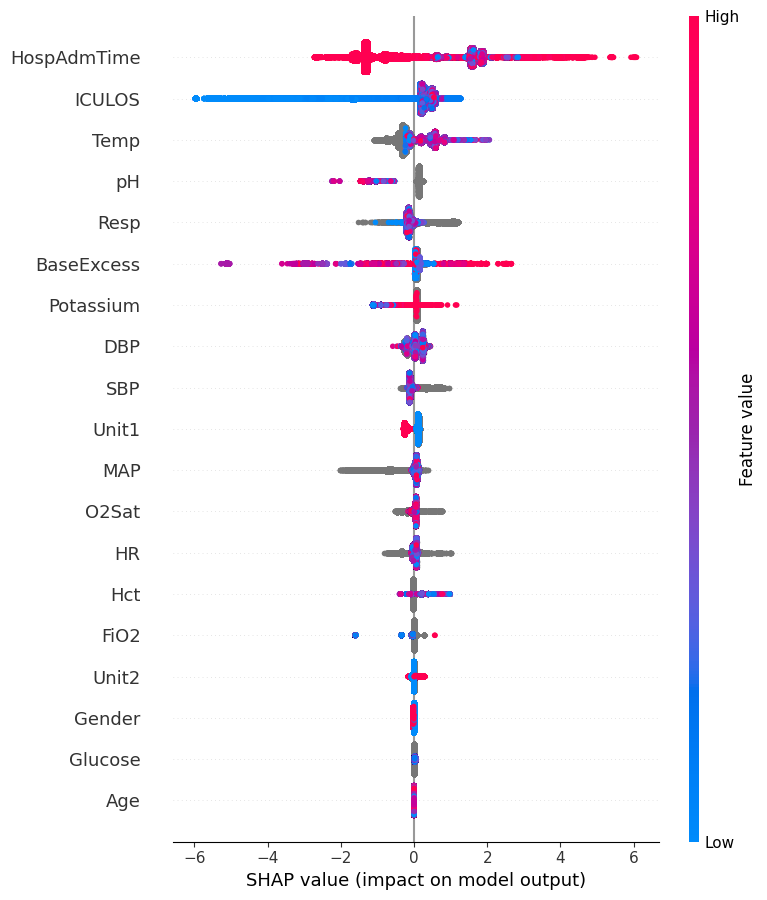

In [19]:
import shap
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

# Define your pipelines
cont_scale_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant", fill_value=999)),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

# Column transformer
preprocess_trans_scale = ColumnTransformer(
    transformers=[
        ('cont', cont_scale_pipeline, ~categorical),
        ('cat', cat_pipeline, categorical)
    ]
)

# Final pipeline
gb_pipe_scale = Pipeline([
    ('preprocess', preprocess_trans_scale),
    ('classifier', GradientBoostingClassifier())
])

# Fit the model
gb_pipe_scale.fit(X_train, y_train)

# SHAP explanation
explainer = shap.Explainer(gb_pipe_scale.named_steps['classifier'], X_train,check_additivity=False)
shap_values = explainer(X_train)

# If you want summary plot
shap.summary_plot(shap_values, X_train)
